## Predicting Term deposit subscription

We need to build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

In [118]:
# importing required libraries
import math

import pandas as pd # For data processing, CSV file I/O (e.g. pd.read_csv())
import numpy as np # For Linear Algebra
import pandas_profiling as pf # Generates profile reports from pandas DataFrame

#importing Machine Learning parameters and classifiers 
from sklearn import preprocessing # provides several common utility functions and transformer classes to change raw feature vectors into a representation more suitable for the downstream estimators
from sklearn.linear_model import LogisticRegression # Logistic Regression (aka logit, MaxEnt) classifier
from sklearn.tree import DecisionTreeClassifier # 
from sklearn.feature_selection import RFE # Feature ranking with recursive feature elimination.
from sklearn import metrics #  includes score functions, performance metrics and pairwise metrics and distance computations
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Build a text report showing the main classification metrics,Compute confusion matrix to evaluate the accuracy of a classification. 
from sklearn.model_selection import train_test_split # splits data into random train and test subsets 
from sklearn.preprocessing import LabelEncoder


#Ensemble classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

#Visulization Libraries
from IPython.display import Markdown, display
import seaborn as sns # data visualization lib based upon matplotlib
import matplotlib.pyplot as plt # is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting
%matplotlib inline
# a magic function which sets the backend of matplotlib to the 'inline' backend

#### Import dataset

In [2]:
dfBankData = pd.read_csv('bank-full.csv')

## Deliverable 1-  Exploratory data quality report 

### Univariate Analysis


###### 1-a 
Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [3]:
dfBankData.head(20)

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    technician   married  secondary      no        6     yes   no   
13   58    technician   married    unknown      no       71     yes   no   
14   57      services   married  secondary      no      162     yes   no   
15   51       retired   married    primary      no      229     yes   no   
16   45        admin.    single    unknown      no       13     yes   no   
17   57   blue-collar   married    primary      no       52     yes   no   
18   60       retired   married    primary      no       60     yes   no   
19   33      services   married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome Target  
0   unknown    5   may       261         1     -1         0  unknown     no  
1   unknown    5   may       151         1     -1         0  unknown     no  
2   unknown    5   may        76         1     -1         0  unknown     no  
3   unknown    5   may        92         1     -1         0  unknown     no  
4   unknown    5   may       198         1     -1         0  unknown     no  
5   unknown    5   may       139         1     -1         0  unknown     no  
6   unknown    5   may       217         1     -1         0  unknown     no  
7   unknown    5   may       380         1     -1         0  unknown     no  
8   unknown    5   may        50         1     -1         0  unknown     no  
9   unknown    5   may        55         1     -1         0  unknown     no  
10  unknown    5   may       222         1     -1         0  unknown     no  
11  unknown    5   may       137         1     -1         0  unknown     no  
12  unknown    5   may       517         1     -1         0  unknown     no  
13  unknown    5   may        71         1     -1         0  unknown     no  
14  unknown    5   may       174         1     -1         0  unknown     no  
15  unknown    5   may       353         1     -1         0  unknown     no  
16  unknown    5   may        98         1     -1         0  unknown     no  
17  unknown    5   may        38         1     -1         0  unknown     no  
18  unknown    5   may       219         1     -1         0  unknown     no  
19  unknown    5   may        54         1     -1         0  unknown     no

In [4]:
dfBankData.shape

(45211, 17)

In [5]:
# Data types present in data
dfBankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
dfBankData.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [7]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
print("Are there any null values ? : ", dfBankData.isnull().values.any())
print("Are there any na values ?   : ", dfBankData.isna().values.any())

print("\n")
print("------------Checking for null ------------------")
print(dfBankData.isnull().sum())
print("------------Cheking for NA ---------------------")
print(dfBankData.isna().sum())

Are there any null values ? :  False
Are there any na values ?   :  False


------------Checking for null ------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
------------Cheking for NA ---------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


There no null or na values in dataset

In [9]:
# Get unique values for all colums
for col in dfBankData.columns:
    print('Col Name {0}: Unique values {1}'.format(col, dfBankData[col].nunique()))

Col Name age: Unique values 77
Col Name job: Unique values 12
Col Name marital: Unique values 3
Col Name education: Unique values 4
Col Name default: Unique values 2
Col Name balance: Unique values 7168
Col Name housing: Unique values 2
Col Name loan: Unique values 2
Col Name contact: Unique values 3
Col Name day: Unique values 31
Col Name month: Unique values 12
Col Name duration: Unique values 1573
Col Name campaign: Unique values 48
Col Name pdays: Unique values 559
Col Name previous: Unique values 41
Col Name poutcome: Unique values 4
Col Name Target: Unique values 2


There are outliers in age
There are outliers in balance


There are no outliers in day

There are outliers in duration
There are outliers in campaign
There are outliers in pdays
There are outliers in previous
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


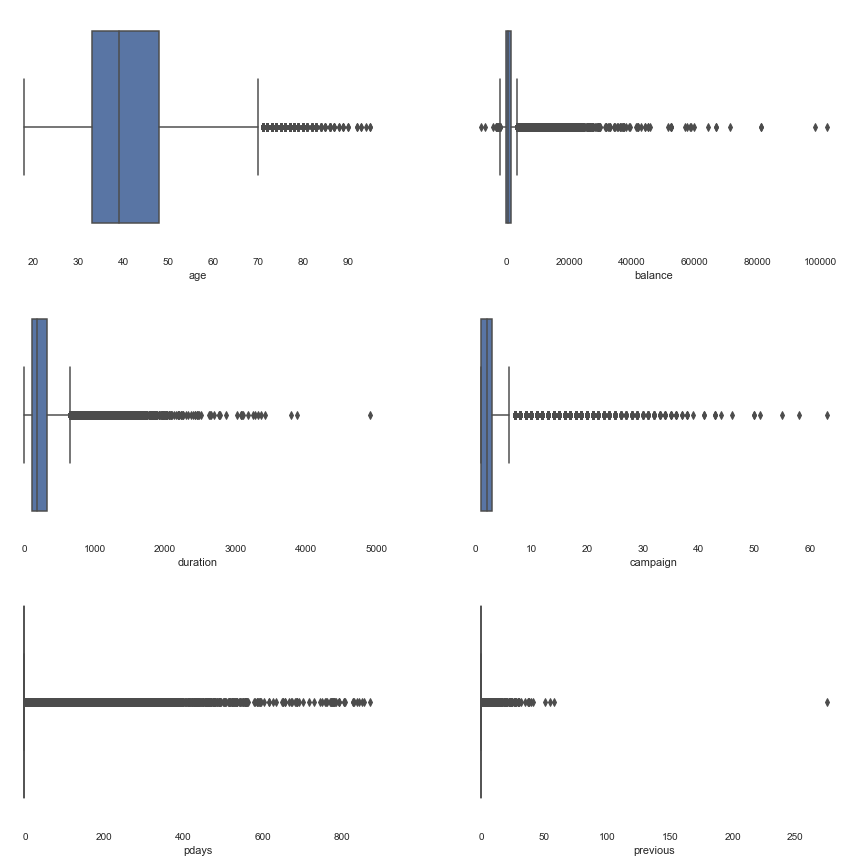

In [10]:
# Finding outliers using Inter-Quartile Range which difference between 75th and 27th percentiles
# IQR = Q₃ − Q₁
# https://en.wikipedia.org/wiki/Interquartile_range
cols =['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']
outliersCols=[]
for col in cols:
    q1 = dfBankData[col].quantile(0.25)
    q3 = dfBankData[col].quantile(0.75)
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr) 
    isOutlier = (dfBankData.loc[(dfBankData[col] < lower_range)|(dfBankData[col] > upper_range)]).empty
    if isOutlier:
        display(Markdown("There are no outliers in {0}".format(col)))#("There are no outliers in {0}".format(col))
    else:
        print("There are outliers in {0}".format(col))
        outliersCols.append(col)
        
print(outliersCols)

noOfRows=(int)(len(outliersCols)/2)
noOfCols=2
fig, axs = plt.subplots(nrows = noOfRows, ncols = noOfCols, figsize=(15,15))
colIndex = 0         
for outlierCol in outliersCols: 
    sns.set()
    sns.boxplot(dfBankData[outlierCol], ax = axs[math.floor(colIndex/noOfCols)][colIndex % noOfCols])
    colIndex += 1 
        

<Figure size 432x288 with 0 Axes>

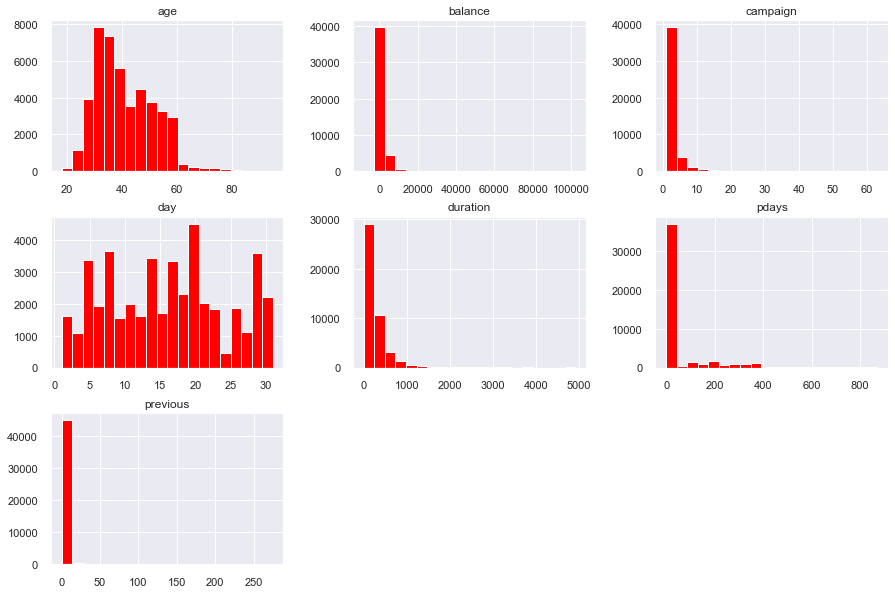

In [11]:
plt.figure()
dfBankData.hist(bins=20, figsize=(15,10), color='red')
plt.show()

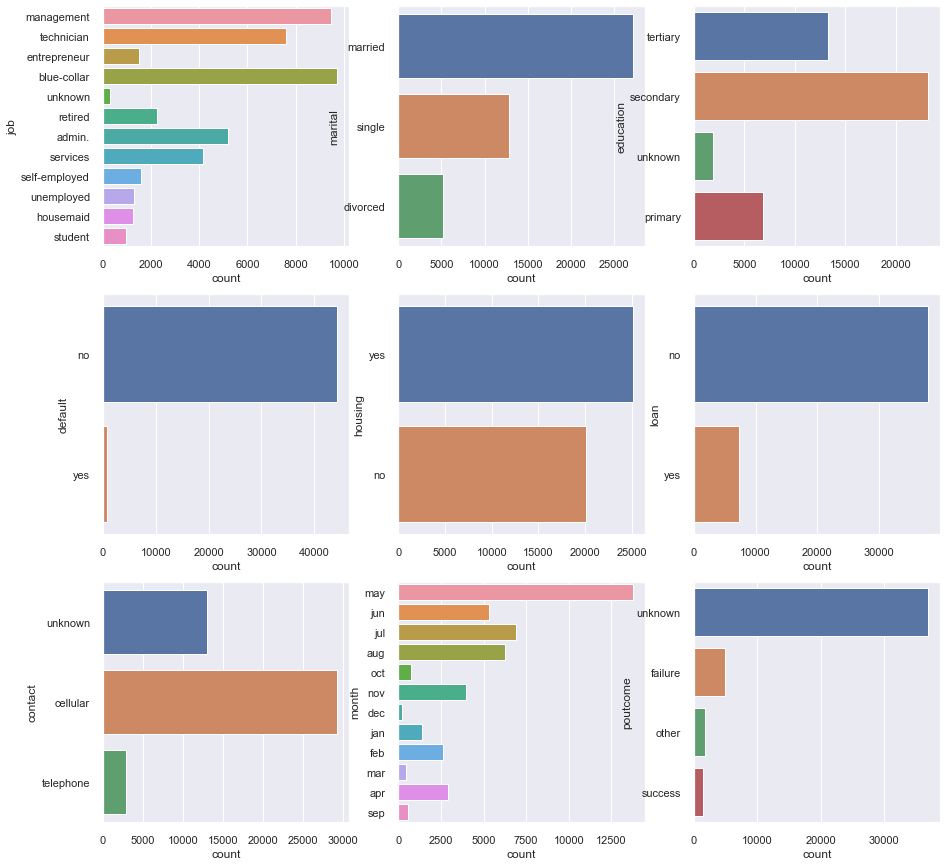

<Figure size 432x288 with 0 Axes>

In [12]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
noOfRows=(int)(len(cat_cols)/3)
noOfCols=3
fig, axs = plt.subplots(nrows = noOfRows, ncols = noOfCols, figsize=(15,15))
colIndex = 0    
plt.figure()
for catCol in cat_cols:
    sns.countplot(y=catCol, data=dfBankData, ax = axs[math.floor(colIndex/3)][colIndex % 3])
    colIndex += 1

In [13]:
pf.ProfileReport(dfBankData)

## Observations
- There are no null or na values in dataset
- There are some values as 'unknown'
- These are no outliers in feature day
- There are outliers in following columns 
    ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
- Columns with unknown values :  [['job', 288], ['education', 1857], ['contact', 13020], ['poutcome', 36959]]

## 1b - Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

In [14]:
# Let's find categorical columns and numerical cols, we'll have to treat then differently
#Numerical cols
numericalCols = list(dfBankData.select_dtypes(exclude=['object']))
categoricalCols = list(dfBankData.select_dtypes(include=['object']))

print(" Numerical Columns are : ", numericalCols, "\n")
print(" Categorical Columns are : ", categoricalCols)

 Numerical Columns are :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 

 Categorical Columns are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


- Most of outliers are in Numerical columns, so outlier treatment shall happen on ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
- Most of unknown values are in categorical columns 

In [15]:
for nu_col in numericalCols:
        print("******************************", nu_col, ":\n" )
        print(dfBankData[nu_col].value_counts(), "\n")

****************************** age :

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64 

****************************** balance :

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64 

****************************** day :

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64 

****************************** duration :

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842   

In [16]:
# Let's find columns with unknown values and value counts 
colsWithUnknownVals = []
for col in dfBankData.columns:
    if 'unknown' in dfBankData[col].values:
        colsWithUnknownVals.append([col, dfBankData[dfBankData[col].str.contains('unknown')][col].count()])
        print("******************************", "\n")
        print("Values Count in - {0} - having unknown value : ".format(col))
        print(dfBankData[col].value_counts(), "\n")
print("************************************************", "\n")        
print("Columns with unknown values : \n", colsWithUnknownVals)
print("************************************************", "\n")         

****************************** 

Values Count in - job - having unknown value : 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

****************************** 

Values Count in - education - having unknown value : 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

****************************** 

Values Count in - contact - having unknown value : 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

****************************** 

Values Count in - poutcome - having unknown value : 
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 

************************************************ 

Columns with unknown value

- Treatment of unknown values 
- Job and education columns 'unknown' values should be replaces with appropriate values considering age, job and education
- For exaple if job is 'housemaid' education columns 'unknown' can be replaced as 'primary'
- If age >60 Job's 'unknown' value can be replaced as 'retired'
- And if no other criteria found 'unknown' can be replaced with first of categorical values or most ocurring categorical value of that column

- Dealing with outliers
- Put values in bucket of ranges, for example age 30,40,50,60 
- Call Duration <10sec can be dropped as these are extreme values for this column


## Multivariate analysis

a.Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. 

Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b.Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plot

In [17]:
# Tagert column - 'Target'
# Numerical columns - Numerical Columns are :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 
# Categorical Columns are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

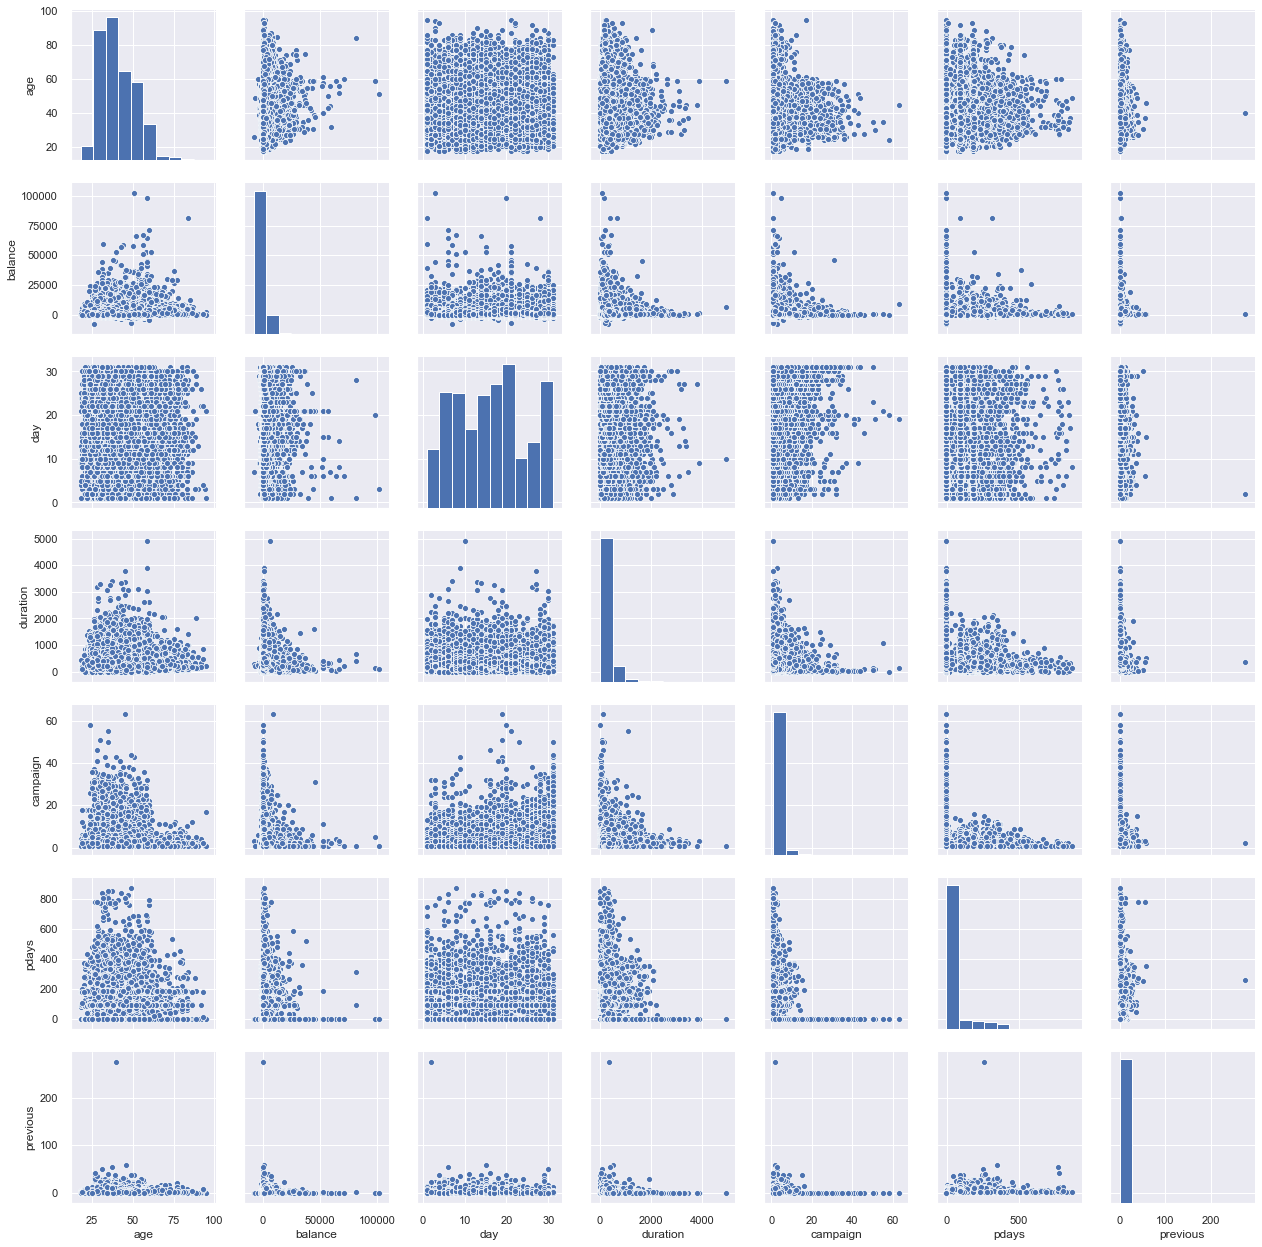

In [18]:
# sns pair plot
sns.pairplot(dfBankData)

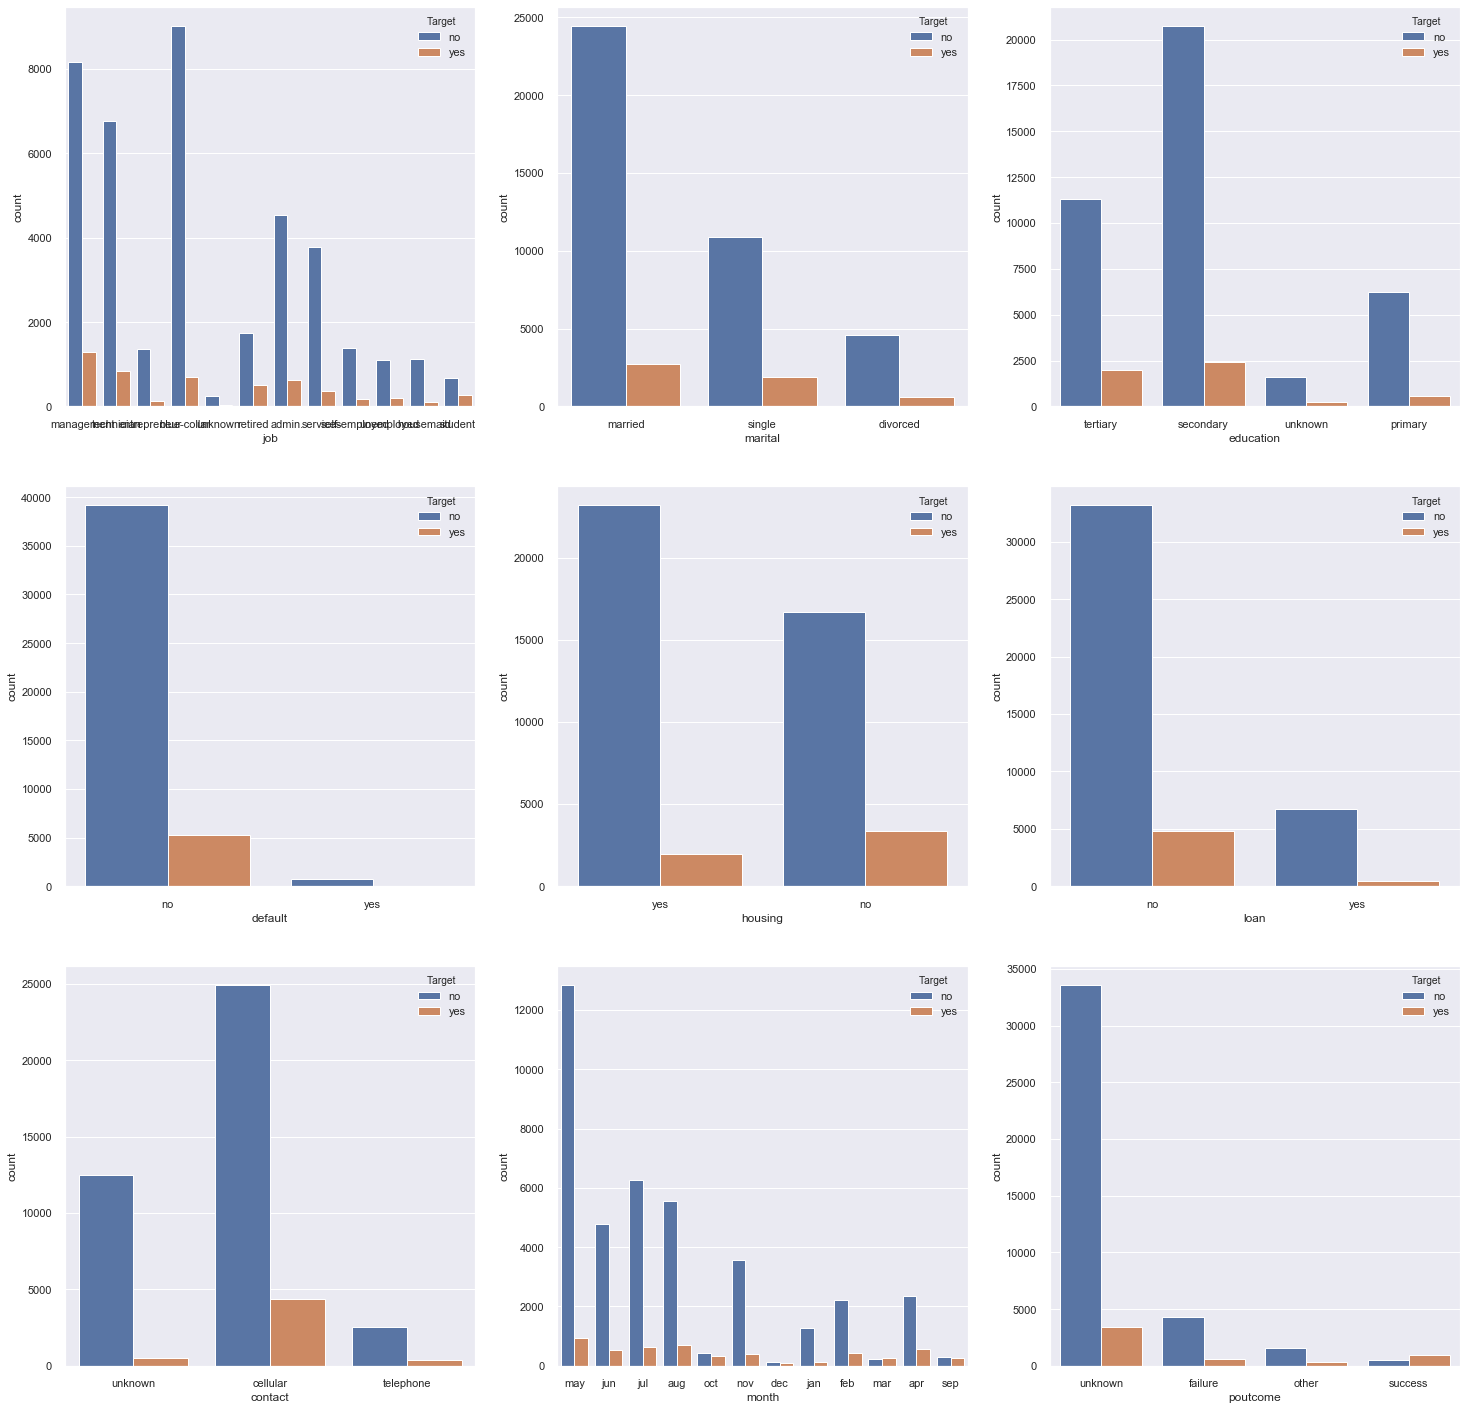

<Figure size 432x288 with 0 Axes>

In [19]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
noOfRows=(int)(len(cat_cols)/3)
noOfCols=3
fig, axs = plt.subplots(nrows = noOfRows, ncols = noOfCols, figsize=(25,25))
colIndex = 0    
plt.figure()
for catCol in cat_cols:
    sns.countplot(x=catCol, hue='Target', data=dfBankData, ax = axs[math.floor(colIndex/3)][colIndex % 3])
    colIndex += 1

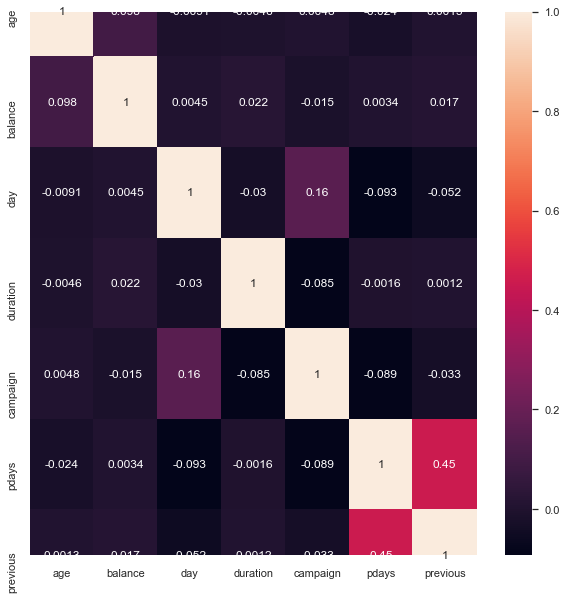

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(dfBankData.corr(), annot = True)

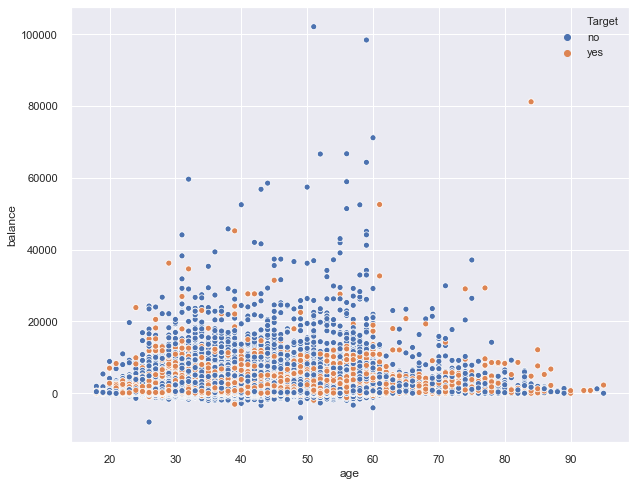

In [21]:
plt.figure(figsize = (10,8))
sns.scatterplot(dfBankData['age'], dfBankData['balance'], hue = dfBankData['Target'])

<Figure size 1296x1152 with 0 Axes>

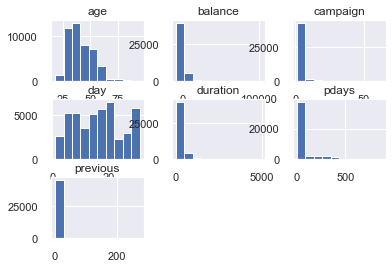

In [22]:
plt.figure(figsize = (18,16))
dfBankData.hist();

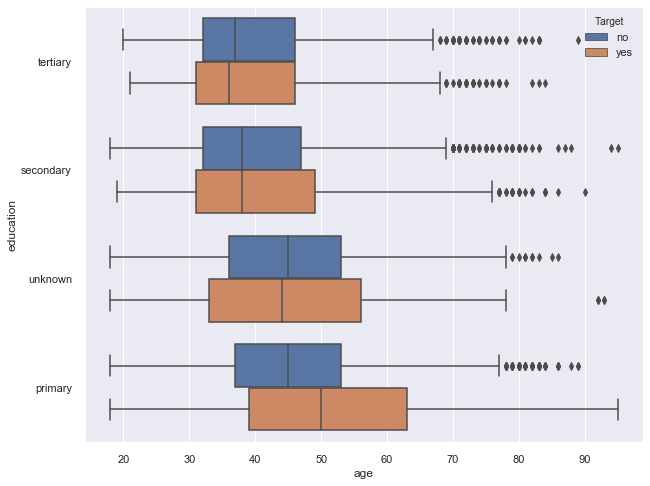

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(x= dfBankData['age'], y=dfBankData['education'], hue=dfBankData['Target'])


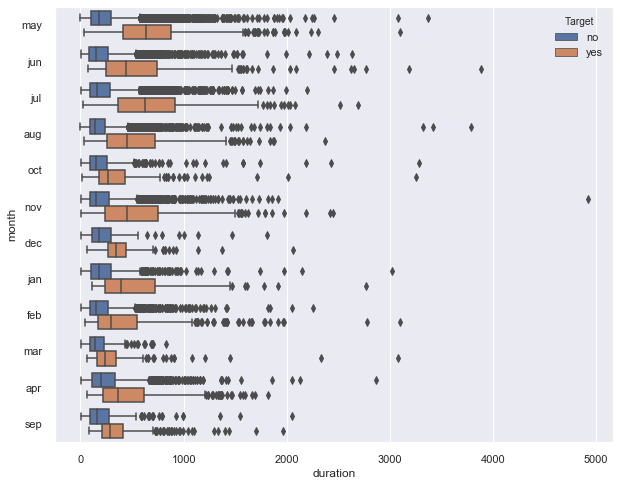

In [24]:
plt.figure(figsize = (10,8))
sns.boxplot(x= dfBankData['duration'], y=dfBankData['month'], hue=dfBankData['Target'])

In [159]:
# TODO Comments 



# 2 Prepare the data for analytics

1.Ensure the attribute types are correct. If not, take appropriate actions.

2.Get the data model ready. 

3.Transform the data i.e. scale / normalize if required

4.Create the training set and test set in ratioof 70:30


In [25]:
# There are mmany columns with type 'object'
categoricalCols = list(dfBankData.select_dtypes(include=['object']))
for catCol in categoricalCols:
    dfBankData[catCol] =dfBankData[catCol].astype('category')

dfBankData.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [26]:
dfBankData.groupby('Target').count()

age    job  marital  education  default  balance  housing   loan  \
Target                                                                       
no      39922  39922    39922      39922    39922    39922    39922  39922   
yes      5289   5289     5289       5289     5289     5289     5289   5289   

        contact    day  month  duration  campaign  pdays  previous  poutcome  
Target                                                                        
no        39922  39922  39922     39922     39922  39922     39922     39922  
yes        5289   5289   5289      5289      5289   5289      5289      5289

In [27]:
def bucketing_balance(data):
    data.loc[data['balance'] <= 72, 'balance'] = 1
    data.loc[(data['balance'] > 72) & (data['balance'] <= 1428), 'balance' ] = 2
    data.loc[(data['balance'] > 1428) & (data['balance'] <= 3462), 'balance' ] = 3
    data.loc[(data['balance'] > 3462) & (data['balance'] <= 102127), 'balance' ] = 4
    return data

bucketing_balance(dfBankData)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no        3     yes   no   
1       44    technician    single  secondary      no        1     yes   no   
2       33  entrepreneur   married  secondary      no        1     yes  yes   
3       47   blue-collar   married    unknown      no        3     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no        2      no   no   
45207   71       retired  divorced    primary      no        3      no   no   
45208   72       retired   married  secondary      no        4      no   no   
45209   57   blue-collar   married  secondary      no        2      no   no   
45210   37  entrepreneur   married  secondary      no        3      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [28]:
def bucketing_education(df):
    df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
    df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
    df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
    df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'

    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
    df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
    

bucketing_education(dfBankData)

In [29]:
dfBankData['job'] = dfBankData.job.replace('unknown',dfBankData.job.mode()[0])
dfBankData['education'] = dfBankData.education.replace('unknown',dfBankData.education.mode()[0])

In [30]:
#putting age into bins
def bucketing_age(df):
    df.loc[df["age"] < 30,  'age'] = 20
    df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
    df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
    df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
    df.loc[df["age"] >= 60, 'age'] = 60

bucketing_age(dfBankData)

In [31]:
dfBankData.head(10)

age           job   marital  education default  balance housing loan  \
0   50    management   married   tertiary      no        3     yes   no   
1   40    technician    single  secondary      no        1     yes   no   
2   30  entrepreneur   married  secondary      no        1     yes  yes   
3   40   blue-collar   married  secondary      no        3     yes   no   
4   30   blue-collar    single  secondary      no        1      no   no   
5   30    management   married   tertiary      no        2     yes   no   
6   20    management    single   tertiary      no        2     yes  yes   
7   40  entrepreneur  divorced   tertiary     yes        1     yes   no   
8   50       retired   married    primary      no        2     yes   no   
9   40    technician    single  secondary      no        2     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [32]:
dfBankData['duration'] = dfBankData['duration'].apply(lambda n:n/60).round(2)

In [33]:
print('Rows count having call duration less than 10 Sec -\t',dfBankData[dfBankData.duration < 10/60]['duration'].count())

Rows count having call duration less than 10 Sec -	 342


In [34]:
# drop rows where call duration was less than 10 seconds
#dropped 342 rows
dfBankData = dfBankData.drop(dfBankData[dfBankData.duration < 10/60].index, axis = 0, inplace = False)

In [35]:
# Transform the data i.e. scale / normalize if required
# Now we have to get dummy variables
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
dfBankData = pd.get_dummies(data = dfBankData, columns = cat_cols, drop_first = True)

dfBankData.head()

age  balance  day month  duration  campaign  pdays  previous Target  \
0   50        3    5   may      4.35         1     -1         0     no   
1   40        1    5   may      2.52         1     -1         0     no   
2   30        1    5   may      1.27         1     -1         0     no   
3   40        3    5   may      1.53         1     -1         0     no   
4   30        1    5   may      3.30         1     -1         0     no   

   job_blue-collar  ...  education_secondary  education_tertiary  default_yes  \
0                0  ...                    0                   1            0   
1                0  ...                    1                   0            0   
2                0  ...                    1                   0            0   
3                1  ...                    1                   0            0   
4                1  ...                    1                   0            0   

   housing_yes  loan_yes  contact_telephone  contact_unknown  poutcome_other  \
0            1         0                  0                1               0   
1            1         0                  0                1               0   
2            1         1                  0                1               0   
3            1         0                  0                1               0   
4            0         0                  0                1               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 31 columns]

In [44]:
# We need to trasnform month column 

In [87]:
label_encoder = LabelEncoder()
dfBankData['month'] = label_encoder.fit_transform(dfBankData['month'])
dfBankData['Target'] = label_encoder.fit_transform(dfBankData['Target'])


dfBankData.head(10)

age  balance  day  month  duration  campaign  pdays  previous  Target  \
0   50        3    5      8      4.35         1     -1         0       0   
1   40        1    5      8      2.52         1     -1         0       0   
2   30        1    5      8      1.27         1     -1         0       0   
3   40        3    5      8      1.53         1     -1         0       0   
4   30        1    5      8      3.30         1     -1         0       0   
5   30        2    5      8      2.32         1     -1         0       0   
6   20        2    5      8      3.62         1     -1         0       0   
7   40        1    5      8      6.33         1     -1         0       0   
8   50        2    5      8      0.83         1     -1         0       0   
9   40        2    5      8      0.92         1     -1         0       0   

   job_blue-collar  ...  education_secondary  education_tertiary  default_yes  \
0                0  ...                    0                   1            0   
1                0  ...                    1                   0            0   
2                0  ...                    1                   0            0   
3                1  ...                    1                   0            0   
4                1  ...                    1                   0            0   
5                0  ...                    0                   1            0   
6                0  ...                    0                   1            0   
7                0  ...                    0                   1            1   
8                0  ...                    0                   0            0   
9                0  ...                    1                   0            0   

   housing_yes  loan_yes  contact_telephone  contact_unknown  poutcome_other  \
0            1         0                  0                1               0   
1            1         0                  0                1               0   
2            1         1                  0                1               0   
3            1         0                  0                1               0   
4            0         0                  0                1               0   
5            1         0                  0                1               0   
6            1         1                  0                1               0   
7            1         0                  0                1               0   
8            1         0                  0                1               0   
9            1         0                  0                1               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  
5                 0                 1  
6                 0                 1  
7                 0                 1  
8                 0                 1  
9                 0                 1  

[10 rows x 31 columns]

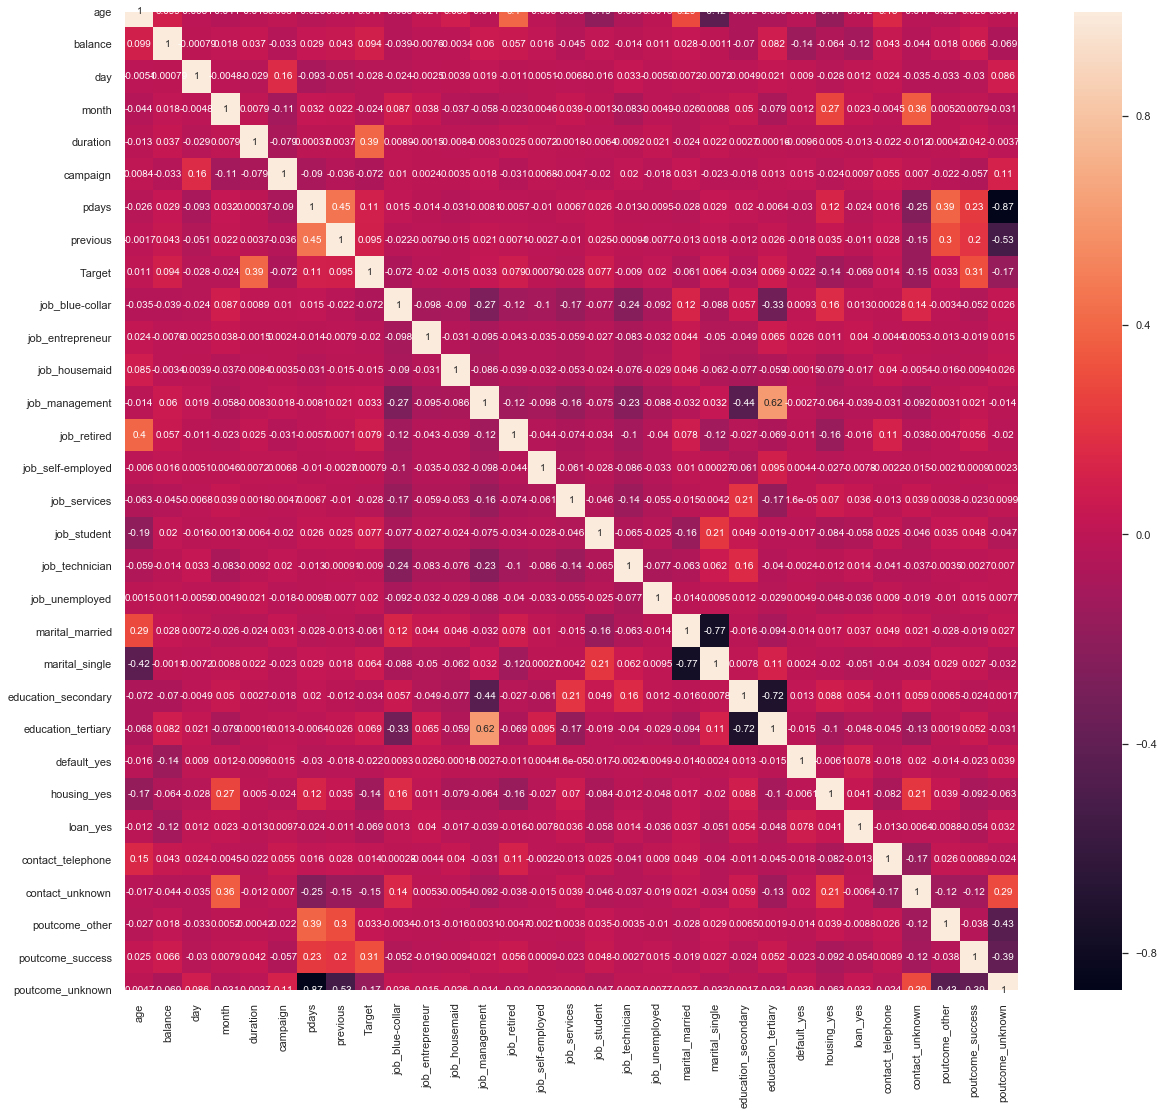

In [105]:
plt.figure(figsize = (20,18))
sns.heatmap(dfBankData.corr(), annot = True)

In [94]:
# Create the training set and test set in ratioof 70:30

In [95]:
X = dfBankData.drop('Target', axis = 1)
y = dfBankData['Target']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31408, 30)
(31408,)
(13461, 30)
(13461,)


### Todo Comments

- TODO

- TODO

- TODO


# Deliverable –3  create the ensemble model

1.First create model susing Logistic Regression and Decision Tree algorithm. Note the model performanceby using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1scoreof themodel.

2.Build the ensemble models(Bagging and Boosting)and note the model performanceby using different matrices. Use same metrics as in above model. (at least 3 algorithms)


### Model creating using Logistic Regression algorithm

In [97]:
mLogReg = LogisticRegression()
mLogReg.fit(X_train, y_train)

y_pred_mLogReg = mLogReg.predict(X_test)

print("Logistirc Regression Model score on training data: {} \n".format(mLogReg.score(X_train, y_train)))
print("Logistirc Regression Model score on test data: {} \n".format(mLogReg.score(X_test, y_test)))
print("Confusion Matrics of Logistirc Regression Model :  \n \n",  confusion_matrix(y_test, y_pred_mLogReg))
roc_

Logistirc Regression Model score on training data: 0.8974465104431992 

Logistirc Regression Model score on test data: 0.8965158606344253 

Confusion Matrics of Logistirc Regression Model :  
 
 [[11576   257]
 [ 1136   492]]


In [98]:
print(classification_report(y_test, y_pred_mLogReg))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11833
           1       0.66      0.30      0.41      1628

    accuracy                           0.90     13461
   macro avg       0.78      0.64      0.68     13461
weighted avg       0.88      0.90      0.88     13461



### Model creating using Decision Tree algorithm

In [99]:
modelDecisionTree_entropy = DecisionTreeClassifier(criterion='gini', random_state = 100,) 
modelDecisionTree_entropy.fit(X_train, y_train)

y_pred_dt_entropy = modelDecisionTree_entropy.predict(X_test)

print("Decision Tree Model score on training data: {} \n".format(modelDecisionTree_entropy.score(X_train, y_train)))
print("Decision Tree Model score on test data: {} \n".format(modelDecisionTree_entropy.score(X_test, y_test)))
print("Confusion Matrics of Decision Tree Model :  \n \n",  confusion_matrix(y_test, y_pred_dt_entropy))

Decision Tree Model score on training data: 1.0 

Decision Tree Model score on test data: 0.8749721417428126 

Confusion Matrics of Decision Tree Model :  
 
 [[10974   859]
 [  824   804]]


In [100]:
print(classification_report(y_test, y_pred_dt_entropy))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11833
           1       0.48      0.49      0.49      1628

    accuracy                           0.87     13461
   macro avg       0.71      0.71      0.71     13461
weighted avg       0.88      0.87      0.88     13461



In [101]:
# pruning the decision tree 

modelDT_entropy_pruned = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 100, min_samples_leaf = 5) 
modelDT_entropy_pruned.fit(X_train, y_train)

y_pred_dt_pruned = modelDT_entropy_pruned.predict(X_test)

print("Pruned Decision Tree Model score on training data: {} \n".format(modelDT_entropy_pruned.score(X_train, y_train)))
print("Pruned Decision Tree Model score on test data: {} \n".format(modelDT_entropy_pruned.score(X_test, y_test)))
print("\n")
print("Pruned Confusion Matrics of Decision Tree Model :  \n \n",  confusion_matrix(y_test, y_pred_dt_pruned))
print(classification_report(y_test, y_pred_dt_pruned))

Pruned Decision Tree Model score on training data: 0.9008214467651554 

Pruned Decision Tree Model score on test data: 0.9000074288685833 



Pruned Confusion Matrics of Decision Tree Model :  
 
 [[11586   247]
 [ 1099   529]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11833
           1       0.68      0.32      0.44      1628

    accuracy                           0.90     13461
   macro avg       0.80      0.65      0.69     13461
weighted avg       0.89      0.90      0.88     13461



In [135]:
accuracies = {}

# 13.  Bagging Classifier Algorithm 

In [136]:
from sklearn.ensemble import BaggingClassifier

model_bgcl = BaggingClassifier(n_estimators = 200,max_samples= .7, bootstrap=True, oob_score=True, random_state = 22)
model_bgcl.fit(X_train, y_train)

model_bgcl_predict = model_bgcl.predict(X_test)
acc_model_bgcl = accuracy_score(y_test, model_bgcl_predict) * 100

accuracies['BaggingClassifer'] = acc_model_bgcl
accuracies['BaggingClassifer']

90.62476784785677

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.1, random_state = 22)
gbcl = gbcl.fit(X_train, y_train)

gbcl_predict = gbcl.predict(X_test)
acc_gbcl = accuracy_score(y_test, gbcl_predict) * 100
accuracies['GradientBoostingClassifier'] = acc_gbcl
accuracies['GradientBoostingClassifier']

90.57276576777356

In [138]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 22)
abcl = abcl.fit(X_train, y_train)

abcl_predict = abcl.predict(X_test)
acc_abcl = accuracy_score(y_test, abcl_predict) *100
accuracies['ADA'] = acc_abcl
accuracies['ADA']

89.77044796077558

In [139]:
accuracies

{'BaggingClassifer': 90.62476784785677,
 'GradientBoostingClassifier': 90.57276576777356,
 'ADA': 89.77044796077558}